## Recurrent Neural Networks and Hypervectors

So, one thing I am thinking about is the connection of the hypervector algebra with the nature of neural networks and other neuro-inspired AI architectures.

The primary difference between a neural network and a hypervector is that the neural network has a weight matrix, where each neuron will influence the others in a feedback manner. This matrix is very general, and people attempt to use it to learn or produce patterns. One connection with the recurrent weight matrix and the hypervector algebra is that the roll/permutation operation can be implemented by this weight matrix.


In [1]:
from pylab import *
import random_idx
import time
%matplotlib inline

height has been deprecated.

2016-04-18 15:55


In [2]:
N=1000
letter_vectors = 2 * (np.random.randn(len(random_idx.alphabet), N) > 0) - 1
print letter_vectors

[[-1  1 -1 ...,  1 -1 -1]
 [ 1 -1  1 ...,  1  1  1]
 [ 1 -1  1 ...,  1  1 -1]
 ..., 
 [-1  1  1 ..., -1 -1  1]
 [ 1  1  1 ..., -1  1  1]
 [ 1 -1  1 ..., -1 -1  1]]


Duration:  0.00155401229858


(array([   6.,   30.,   94.,   80.,  246.,  262.,   97.,  124.,   50.,   11.]),
 array([-18. , -14.6, -11.2,  -7.8,  -4.4,  -1. ,   2.4,   5.8,   9.2,
         12.6,  16. ]),
 <a list of 10 Patch objects>)

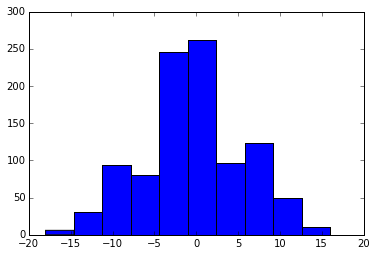

In [3]:
hypervec = np.zeros(N)

# So, we can add stuff to the hypervec as usual
letter_sequence = 'store these letters in the hypervector'

tstart = time.time()
for l in letter_sequence:
    lidx = random_idx.alphabet.find(l)
    
    hypervec = np.roll(hypervec, 1) + letter_vectors[lidx, :]
     
print 'Duration: ', time.time() - tstart

hist(hypervec)

So, now the hypervector has each letter stored at an index using the roll operation. You can see how we just roll the hypervector each time we add a letter, as if the hypervector could be taking in a continuous stream. 

We can then derefence the hypervector, and get the letters at certain positions.

r o t c e v r e p y h   e h t   n i   s r e t t e l   e s e h t   e r o t s


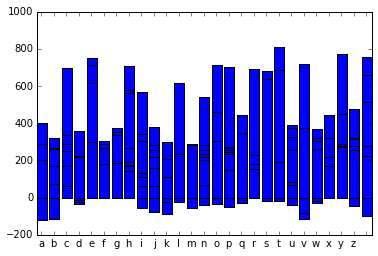

In [4]:
def letter_at_pos(pos):
    v = np.roll(hypervec, -pos)
    vals = np.dot(letter_vectors/N, v.T)
    bar(arange(len(vals))+0.15, vals)   
    ax=gca()
    ax.set_xticks(arange(len(random_idx.alphabet))+0.5)
    th = ax.set_xticklabels(list(random_idx.alphabet))
    return argmax(vals)

for i in range(len(letter_sequence)):
    print random_idx.alphabet[letter_at_pos(i)],
    

4

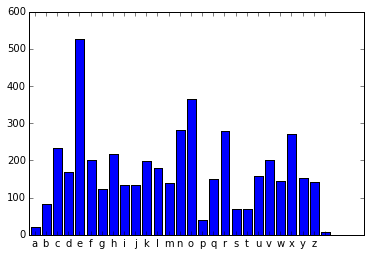

In [5]:
letter_at_pos(21)


So, it prints the letters out backwards, which is what we asked. 

Now, the roll operation can be equivalently expressed as a matrix multiply. 

In [6]:
roll_matrix = np.eye(N,N)

roll_matrix = np.roll(roll_matrix, -1, axis=1)

print roll_matrix

[[ 0.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


This is just an off-diagonal matrix, and this should do the exact permutation operation as roll, but it will be much more inefficient. However, this takes us a step towards generalizing hypervector algebra for recurrent neural networks, because now we can treat the roll matrix as the weights of an RNN.

First, lets just make sure it really does work the same way.

Duration:  0.0157110691071


(array([   6.,   30.,   94.,   80.,  246.,  262.,   97.,  124.,   50.,   11.]),
 array([-18. , -14.6, -11.2,  -7.8,  -4.4,  -1. ,   2.4,   5.8,   9.2,
         12.6,  16. ]),
 <a list of 10 Patch objects>)

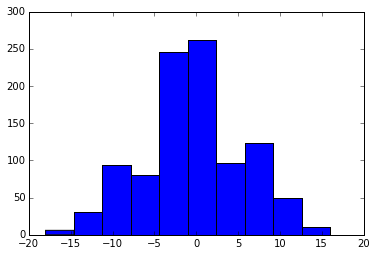

In [7]:
hyperrnn = np.zeros(N)

tstart = time.time()
for l in letter_sequence:
    lidx = random_idx.alphabet.find(l)
    
    hyperrnn = np.dot(roll_matrix, hyperrnn) + letter_vectors[lidx, :]
    
print 'Duration: ', time.time() - tstart

hist(hyperrnn)

In [8]:
print hypervec==hyperrnn

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

r o t c e v r e p y h   e h t   n i   s r e t t e l   e s e h t   e r o t s


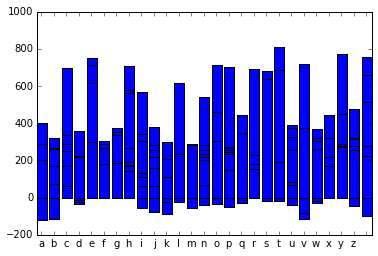

In [9]:
def letter_at_pos_rnn(pos):    
    v = np.dot(np.roll(np.eye(N,N), pos, axis=1), hyperrnn)
    
    vals = np.dot(letter_vectors/N, v.T)
    bar(arange(len(vals))+0.15, vals)   
    ax=gca()
    ax.set_xticks(arange(len(random_idx.alphabet))+0.5)
    th = ax.set_xticklabels(list(random_idx.alphabet))
    return argmax(vals)

for i in range(len(letter_sequence)):
    print random_idx.alphabet[letter_at_pos_rnn(i)],
    

In this case we have to build the unrolling matrix, and then we do matrix multiply, which is much slower. 

## Roll is a permutation matrix

So, the question is what other types of matrices are acceptable as a roll martix. Typically with an RNN, the recurrent weights are just set randomly, but here we can see the hypervector algebra can be created with a certain type of roll matrix/connectivity. The roll matrix at heart is an *orthonormal basis*, but I do not think that every index must be 1 or 0. This matrix can be made more generally, and there are certain properties about this matrix that relate to how an RNN may work and store information.

One thing to note is that there is a pattern to the roll matrix -- we cycle through all N possible permutations, and so the roll matrix cannot just be any orthonormal basis. Obviously, the identity matrix would not serve as a good roll matrix. At some point with the permutations, we will do a complete loop around the dimensions. This means that any good roll matrix should have a property like:

$$
R^N = I
$$

and 

$$
R^j \ne I \\ for j \ne (N-1)
$$

Which basically says that the roll matrix cycles through all the dimensions, and then completes a full loop after N steps. But, you can imagine a lot of orthonormal bases that would not cycle through each dimension. If the vectors in the roll_matrix are rearranged, then the orthonormal basis part stays constant. However, if you switch a few of them, you can make the roll matrix cycle back to the beginning in less than N steps. The identity matrix cycles back in 1 step. The more steps it takes to cycle, then the more positions you have in memory.



In [10]:
def random_orthogonal(n):
    a = np.random.random((n,n))
    q, r = np.linalg.qr(a)
    
    return q

In [11]:
tstart = time.time()
ro = random_orthogonal(N)
print time.time() - tstart
print ro

0.534034967422
[[-0.00465947 -0.05784956  0.00124796 ..., -0.02376072 -0.05718671
   0.00054542]
 [-0.01126536 -0.00725692 -0.01308165 ..., -0.06106317  0.01371128
   0.07363751]
 [-0.01140667 -0.00125225 -0.04076648 ...,  0.00670959  0.00591389
   0.00053313]
 ..., 
 [-0.01525672  0.01708019 -0.02846395 ...,  0.03997402 -0.00163758
   0.03526775]
 [-0.01661889 -0.05517815  0.04250532 ...,  0.00414027  0.03914118
  -0.02431875]
 [-0.04186403  0.03391536 -0.02399106 ...,  0.0195168  -0.04144963
   0.01593434]]


Ok, so a random orthogonal matrix, should work just as well as the roll matrix... 

In [12]:
ro.shape

(1000, 1000)

Duration:  0.0127549171448


(array([   2.,   15.,   76.,  164.,  247.,  251.,  168.,   62.,   13.,    2.]),
 array([-21.08107048, -16.8528225 , -12.62457453,  -8.39632655,
         -4.16807857,   0.06016941,   4.28841738,   8.51666536,
         12.74491334,  16.97316131,  21.20140929]),
 <a list of 10 Patch objects>)

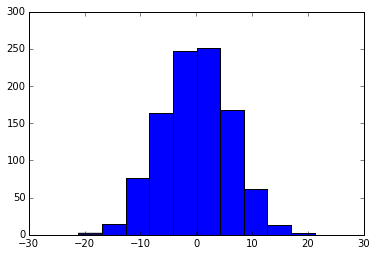

In [13]:
hyperro = np.zeros(N)

tstart = time.time()
for l in letter_sequence:
    lidx = random_idx.alphabet.find(l)
    
    hyperro = np.dot(ro, hyperro) + letter_vectors[lidx, :]
    
print 'Duration: ', time.time() - tstart

hist(hyperro)

r o t c e v r e p y h   e h t   n i   s r e t t e l   e s e h t   e r o t s


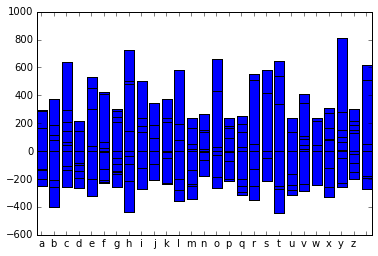

In [14]:
def letter_at_pos_ro(pos): 
    # so to read out, we need to decode the ro, which means we have to do a bunch of matrix multiplies.
    
    v = np.dot(np.linalg.matrix_power(ro, -pos), hyperro)
    #v = np.dot(np.roll(np.eye(N,N), pos, axis=1), hyperrnn)
    
    vals = np.dot(letter_vectors/N, v.T)
    bar(arange(len(vals))+0.15, vals)   
    ax=gca()
    ax.set_xticks(arange(len(random_idx.alphabet))+0.5)
    th = ax.set_xticklabels(list(random_idx.alphabet))
    return argmax(vals)

for i in range(len(letter_sequence)):
    print random_idx.alphabet[letter_at_pos_ro(i)],
    

Cool! So, yes, can just use a random orthonormal matrix as the permutation operation, and can store the hypervectors in the same fashion. 

This is terribly slow, however, because we have to compute the inverse of the matrix and raise it to a power to go backwards. However, the important point is that we have taken another step towards generalizing the hypervector math to neural networks. 

This is important because I think that the storage capacity of the hypervectors and utilizing the math is extremely important to consider in the context of an RNN. Becuase we can show that hypervectors and RNN are essentially equivalent, we can say that the storage capacity of a hypervector is similar to RNN.

I think this is essential because many don't consider the capacity of an RNN -- how much information can it keep in the recurrent dynamics? Well, the limit is set by how much a hypervector can hold. 

I think so long as the matrix is orthonormal it should work. Of course identity would not work, even though its orthonormal, and then there are tons of other permutations that won't work as well. At some point the permutation operation has to do a loop, and the max number of iterations for a loop would be N (does it have to loop at some point?). 

But random orthonormal matrix works well. The hypervector probably cannot store N values anyway, so the loop issue is not so bad. A random basis will likely not have N steps before looping, but it should be high or close to N (maybe?). 


The final difference with the RNN and hypervectors is that the hypervectors are entirely linear. An RNN often has a non-linear threshold/saturation function. What would this mean in terms of storage and capacity? How would decoding/dereferencing the memory work? 




## Plate RNN

An alternative vector-symbolic architecture to hypercomputing with binary splatter codes (Kanerva) is the Holographic Reduced Representation (Plate, 1995). This architecture still uses high-dimensional vectors but has a different set of representations and operations. In a similar fashion, the HRR computing architecture can be straight-forwardly generalized to a linear recurrent neural network, and we can use the algebra of the mathematics to directly encode and decode a long series of input symbols. 

In the HRR framework, the hypervector representations change from $[-1, +1]^N$ to hypervectors with elements chosen from a normal distributrion -- ($[\mathscr{N}(0,1/N)]^N$). These vectors have an expected value length of 1, as well as the representations can be made to have exactly norm 1 (this is typically more useful). The other primary difference is that the HRR framework uses "circular convolution" ($\oplus$) for binding.

In the Kanerva framework, we illustrated how to use the roll operation to store a stream of letters into a hypervector, and related this operation to neural networks. This same procedure can be followed under the Plate framework using circular convolution.

According to Plate 1995, the circular convolution can be transformed into a matrix multiply for a fixed vector. This takes us towards reconsidering the Plate circular convolution in terms of a recurrent neural network. In fact, Plate even states this idea that circular convolution with a fixed vector can be turned into a matrix multiply and he states that this could be part of a feed-forward neural network. 

> "The convolution operation can be expressed as a matrix-vector multiplication.
$$
    a \oplus b = M_a b
$$
> "where $M_a$ is the matrix corresponding to convolution by $a$. It has elements $m_{a_{ij}}=a_{i-j}$ (where the subscripts on a are interpreted modulo n). Such matrices are known as "circulant matrices" [6]. The eigenvalues of $M_a$ are the individual (complex valued) elements of the Fourier transform of $a$. The corresponding eigenvectors are the inverse transform of the frequency components (i.e., $(1,0,0,...), (0,1,0,...), etc.$ in the frequency domain). Thus it is possible for the mapping computed by the connections between two layers in a feed-forward network (i.e. a matrix multiplication) to correspond to convolution by a fixed vector."

This should mean that the roll vector can be transformed into a weight matrix. And luckily scipy has a built-in function for making the circulant matrix from a given vector.


In [168]:
def cconv(a, b):
    return ifft(fft(a) * fft(b))
    
def ccinv(a):
    return ifft(np.conj(fft(a)))  

In [169]:
import nengo
N=1000
hs = nengo.dists.UniformHypersphere()
letter_vectors = hs.sample(len(random_idx.alphabet), N)
letters = random_idx.alphabet.replace(' ', '_')

for i in range(len(random_idx.alphabet)):
    # ok pretty close to 1, but lets make it exact.
    letter_vectors[i,:] = letter_vectors[i,:] / norm(letter_vectors[i,:])
    
#roll_vector = hs.sample(1, N)[0]
#roll_vector = roll_vector / norm(roll_vector)

# the roll_vector has to be unitary
roll_vector = ifft(2*(np.random.randn(N) > 0) - 1)


In [170]:
roll_vector.shape

(1000,)

In [171]:
import scipy

roll_matrix = scipy.linalg.circulant(roll_vector)
print roll_matrix

[[-0.01400000+0.j         -0.02783650+0.00198861j  0.02238595-0.01782821j
  ...,  0.00202977+0.0136333j   0.02238595+0.01782821j
  -0.02783650-0.00198861j]
 [-0.02783650-0.00198861j -0.01400000+0.j         -0.02783650+0.00198861j
  ...,  0.01676155-0.036691j    0.00202977+0.0136333j
   0.02238595+0.01782821j]
 [ 0.02238595+0.01782821j -0.02783650-0.00198861j -0.01400000+0.j         ...,
  -0.03689781-0.01063487j  0.01676155-0.036691j    0.00202977+0.0136333j ]
 ..., 
 [ 0.00202977-0.0136333j   0.01676155+0.036691j   -0.03689781+0.01063487j
  ..., -0.01400000+0.j         -0.02783650+0.00198861j
   0.02238595-0.01782821j]
 [ 0.02238595-0.01782821j  0.00202977-0.0136333j   0.01676155+0.036691j
  ..., -0.02783650-0.00198861j -0.01400000+0.j         -0.02783650+0.00198861j]
 [-0.02783650+0.00198861j  0.02238595-0.01782821j  0.00202977-0.0136333j
  ...,  0.02238595+0.01782821j -0.02783650-0.00198861j -0.01400000+0.j        ]]


In [172]:
am = np.dot(roll_matrix, letter_vectors[0,:])
av = cconv(roll_vector, letter_vectors[0,:])
print am[0:10]
print av[0:10]

[-0.01297372-0.00969741j -0.03218527+0.00783879j  0.02770900+0.02540485j
 -0.00043901+0.0059081j  -0.00496367-0.02008662j  0.00915860+0.01101964j
  0.01570676-0.02038434j -0.00154384-0.01107459j  0.01073574+0.03126027j
 -0.03671324+0.00069053j]
[-0.01297372-0.00969741j -0.03218527+0.00783879j  0.02770900+0.02540485j
 -0.00043901+0.0059081j  -0.00496367-0.02008662j  0.00915860+0.01101964j
  0.01570676-0.02038434j -0.00154384-0.01107459j  0.01073574+0.03126027j
 -0.03671324+0.00069053j]


Now, we can really see a direct connection between Plate and Kanerva and how these algebraic theories describe the operations of recurrent neural networks. 

In the Plate framework, the `roll_vector` is a unit norm vector. And the `roll_matrix` is the *circulant matrix* of the roll vector. A circulant matrix created from a unit norm vector is also just a unitary permutation matix.



In [173]:
kanerva_roll_vec = np.zeros(N)
kanerva_roll_vec[1] = 1

kanerva_roll_matrix = scipy.linalg.circulant(kanerva_roll_vec)
print kanerva_roll_matrix

[[ 0.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [180]:
norm(ifft(kanerva_roll_vec))

0.031622776601683777

In [174]:
norm(cconv(roll_vector, letter_vectors[19,:]))

0.99999999999999956

In [175]:
norm(roll_vector), norm(letter_vectors[19,:])

(0.99999999999999989, 0.99999999999999989)

If the random vector to bind to used in Plate's framework happens to be $[0, 1, 0, ... 0]$, then the Plate and Kanerva operations are *exactly* the same. 

Duration:  0.00794816017151


(array([   5.,   24.,   84.,  204.,  231.,  226.,  133.,   60.,   28.,    5.]),
 array([-0.8541083 , -0.67874254, -0.50337677, -0.32801101, -0.15264524,
         0.02272052,  0.19808629,  0.37345205,  0.54881782,  0.72418358,
         0.89954935]),
 <a list of 10 Patch objects>)

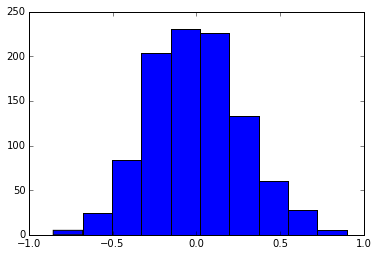

In [178]:
platernn = np.zeros(N)

tstart = time.time()
for l in letter_sequence:
    lidx = random_idx.alphabet.find(l)
    
    platernn = cconv(roll_vector, platernn) + letter_vectors[lidx, :]
    
print 'Duration: ', time.time() - tstart

hist(real(platernn))

t e t e t e t e t e t e t e t e t e t e t e t e t e t e t e t e t e t e t e


/home/epaxon/anaconda2/lib/python2.7/site-packages/matplotlib/transforms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=np.float_).reshape(2, 2)
/home/epaxon/anaconda2/lib/python2.7/site-packages/matplotlib/transforms.py:1895: ComplexWarning: Casting complex values to real discards the imaginary part
  np.float_)


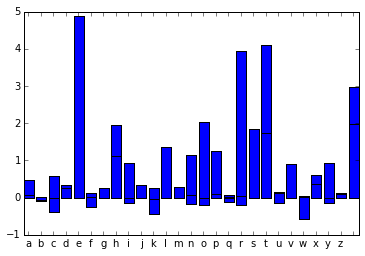

In [179]:
def letter_at_pos_plate(pos): 
    # so to read out, we need to decode the ro, which means we have to do a bunch of matrix multiplies.
    
    if pos > 0:
        rv = np.zeros(N)
        rv[0] = 1
        for i in range(pos):
            rv = cconv(rv, roll_vector)
            
        v = cconv(platernn, rv)
    else:
        v = platernn
    
    vals = np.dot(letter_vectors, v.T)
    bar(arange(len(vals))+0.15, vals)   
    ax=gca()
    ax.set_xticks(arange(len(random_idx.alphabet))+0.5)
    th = ax.set_xticklabels(list(random_idx.alphabet))
    return argmax(vals)

for i in range(len(letter_sequence)):
    print random_idx.alphabet[letter_at_pos_plate(i)],
    

In [166]:
norm(cconv(roll_vector, roll_vector))


0.99999999999999967

In [92]:
print letter_sequence

store these letters in the hypervector


In [66]:
v = cconv(platernn, ccinv(roll_vector))


2.41910204986


In [119]:
rv = roll_vector
for i in range(10):
    print norm(rv)
    rv = cconv(rv, rv)

1.0
1.46941901689
5.82144458975
259.044830645
1188079.5114
3.11579555248e+13
2.17065398513e+28
1.05357680282e+58
2.48208929831e+117
inf


In [77]:
for i in range(1):
    print i


0
